# Assignment 2
### Understanding Uncertainty
### Due 9/12
#### Chase Cha (yht7nf)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

idf = pd.read_csv("../data/iowa.csv")
idf.head()

,Invoice/Item Number,Date,Store Number,Store Name,Zip Code,Category Name,Vendor Name,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars)
0,INV-59108400026,06/06/2023,3723,J D SPIRITS LIQUOR,51040,STRAIGHT RYE WHISKIES,INFINIUM SPIRITS,27102,TEMPLETON RYE 4YR,750,18.09,27.14,2,54.28
1,S16879800057,01/16/2014,3926,LIQUOR DOWNTOWN / IOWA CITY,52240,VODKA 80 PROOF,HEAVEN HILL BRANDS,35416,BURNETT'S VODKA 80 PRF,750,4.84,7.26,12,87.12
2,INV-05301100019,06/05/2017,3829,GARY'S FOODS / MT VERNON,52314,CANADIAN WHISKIES,DIAGEO AMERICAS,11296,CROWN ROYAL,750,15.59,23.39,6,135.66
3,INV-40973500083,10/14/2021,5102,WILKIE LIQUORS,52314,AMERICAN SCHNAPPS,JIM BEAM BRANDS,82787,DEKUYPER BUTTERSHOTS,1000,7.87,11.81,12,141.72
4,INV-17022500013,01/18/2019,2560,HY-VEE FOOD STORE / MARION,52302,WHISKEY LIQUEUR,SAZERAC COMPANY INC,64863,FIREBALL CINNAMON WHISKEY,200,2.50,3.75,12,45.00


1. 'State Bottle Retail' is the price at which the bottle is sold, while 'State Bottle Cost' is the price the state pays for a bottle.
- How do you define the most profitable item? Why? Explain your thinking.
  - Since profit is defined as the difference between total revenue and total costs, the most profitable item or bottle would be the bottle that has the greatest different between its generated revenue and cost. To calculate this, we can take the price of the bottle times the quantity sold to get the total revenue per bottle. Then, we can take the cost of the bottle times the quantity sold to get the total cost per bottle. The difference between these two is profit.
- Use `.groupby` calculations to determine the most profitable liquors sold in Iowa.
  - see code below
- Make a plot of the top liquors.
  - see plot below

<Axes: xlabel='Profit', ylabel='Item Description'>

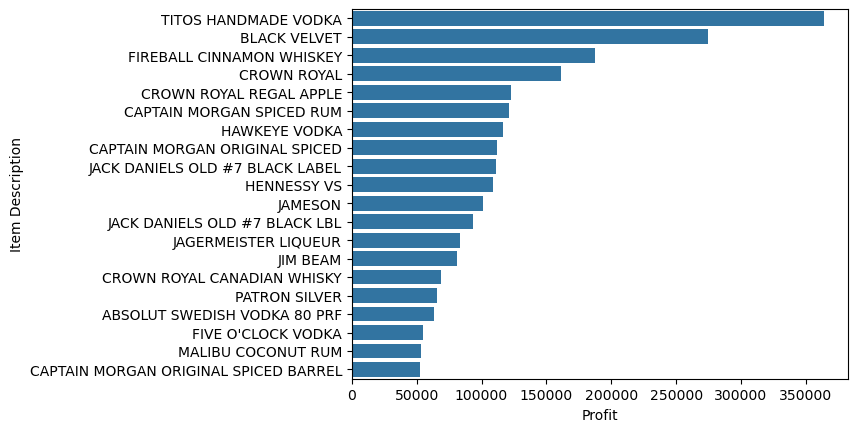

In [3]:
summary = (
    idf.groupby("Item Description")
      .agg(
          Revenue=("Bottles Sold", lambda x: (x * idf.loc[x.index, "State Bottle Retail"]).sum()),
          Cost=("Bottles Sold", lambda x: (x * idf.loc[x.index, "State Bottle Cost"]).sum())
      )
)

summary["Profit"] = summary["Revenue"] - summary["Cost"]
summary = summary.sort_values("Profit", ascending=False)

top_profit = summary[:20].copy().reset_index()

sns.barplot(
    data=top_profit,
    x="Profit",
    y="Item Description",
    orient='h'
)

2. This question is to further explore broadcasting in NumPy.

- In the first code chunk below, there are two vectors, $x$ and $y$. What happens when you try to subtract them?
  - When you try to subract $x$ and $y$, you get a ValueError since the two operands cannot be broadcast together due to their shape, meaning x with shape (3,) and y with shape (2,) cannot be subtracted.
- Instead, try `x.reshape(-1,1)-y.reshape(1,-1)`. What do you get?
  - When trying the above, I get a resulting matrix with shape (3, 2) that subtracts x - y for each combination of x and y values. The resulting matrix is `[[-1, -4], [1, -2], [3, 0]]`
- Try `x.reshape(1,-1)-y.reshape(-1,1)`. Compare the results to your previous answer.
  - When trying this approach, I get a resulting matrix of shape (2, 3) that still subtracts x - y for each combination of x and y values. In other words, this result is the transpose of the matrix from the previous question.
- Write two double for-loops to replicate the results of the previous two answers. 
  - See code block below containing the double for loops.
- Clearly explain how `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$
  - Based on the above answers, `x.reshape(1, -1)` appears to change $x$ from a one-dimensional array into a row vector shape of `(1, len(x))`. On the other hand, `x.reshape(-1, 1)` changes the shape of $x$ from a one-dimensional array into a column vector shape with `(len(x), 1)`. I believe where the `1` appears in the argument determines whether the row count or column count will be 1. By using this, we are able to avoid the ValueError and ensure that $x$ and $y$ are the correct shapes to be subtracted/broadcast together.

In [3]:
import numpy as np

x = np.array([1,3,5])
y = np.array([2,5])

z = x.reshape(-1, 1) - y.reshape(1, -1)

v = x.reshape(1, -1) - y.reshape(-1, 1)

# double for-loop to replicate x.reshape(-1,1)-y.reshape(1,-1)
replicated_z = np.zeros((len(x), len(y)))
for i in range(len(x)):
  for j in range(len(y)):
    replicated_z[i, j] = x[i] - y[j]

# double for-loop to replicate x.reshape(1,-1)-y.reshape(-1,1)
replicated_v = np.zeros((len(y), len(x)))
for i in range(len(y)):
  for j in range(len(x)):
    replicated_v[i, j] = x[j] - y[i]

print(z)
print(replicated_z)

print(v)
print(replicated_v)

[[-1 -4]
 [ 1 -2]
 [ 3  0]]
[[-1. -4.]
 [ 1. -2.]
 [ 3.  0.]]
[[-1  1  3]
 [-4 -2  0]]
[[-1.  1.  3.]
 [-4. -2.  0.]]


3. The indicator function $\mathbb{I}\{ x \le z \}$ takes the value 0 if $x>z$ and 1 if $x \le z$ is true, or
$$
\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
1, &x \le z
\end{cases}
$$

- For $x = 3$, plot the indicator function for any $z$
  - See code and plot directly below.
- Explain how $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$. Drawing a plot might help, or looking at the definition given above.
  - Based on the definition given above, $\mathbb{I}\{ x \le z \}$ equals 1 when $x \le z$. Thus, for x values less than or equal to z, the expression $ 1- \mathbb{I}\{ x \le z \}$ will equal 0, since $ 1-1 $ is 0. On the other hand, if $ x > z $, then $\mathbb{I}\{ x \le z \}$ equals 0 based on the above definition. This means the expression $ 1- \mathbb{I}\{ x \le z \}$ will equal 1 when x is greater than z. From this, we have the following:
  $$
  1- \mathbb{I}\{ x \le z \} = \begin{cases}
  0, &x \le z \\
  1, &x > z
  \end{cases}
  $$
  - The above definition for the expression is the same thing as the indicator function described by $\mathbb{I}\{ x > z \}$, meaning the two are equal.
- The code below generates a random sample for different numbers of observations, $N = 3, 30, 300, 3000 $. Write a function to compute the ECDF curve for each sample, and plot your results.
  - See code and plots below.
- Describe in your own words what happens to the ECDF qualitatively as the sample size $N$ increases
  - As the sample size $N$ increases, the ECDF becomes a much smoother and closer approximation of the underlying distribution. At smaller sample sizes, the ECDF has very hard jumps and only increases with large steps. However, as the sample size grows these jumps become smaller until the ECDF looks relatively smooth for $N = 3000$.

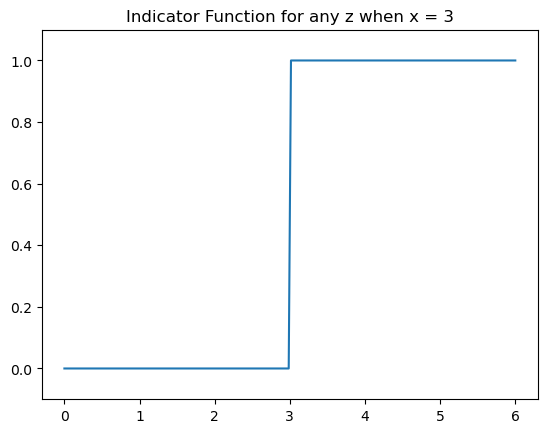

In [7]:
x = 3  # fixed x value

def indicator(z, x):
    """Indicator function: 0 if x > z, else 1"""
    return (x <= z).astype(int)

# Create grid of z values
z = np.linspace(0, 6, 200)

# Compute indicator values
I_z = indicator(z, x)

# Plot
sns.lineplot(x=z, y=I_z)
plt.title("Indicator Function for any z when x = 3")
plt.ylim(-0.1, 1.1)
plt.show()

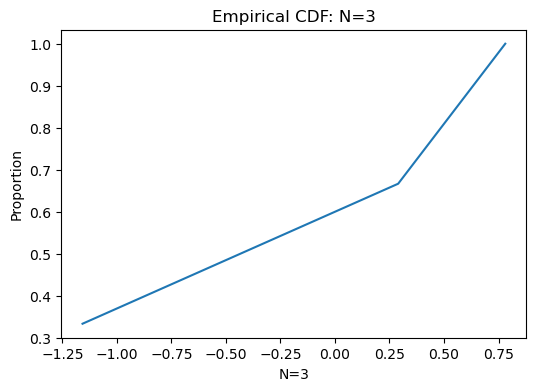

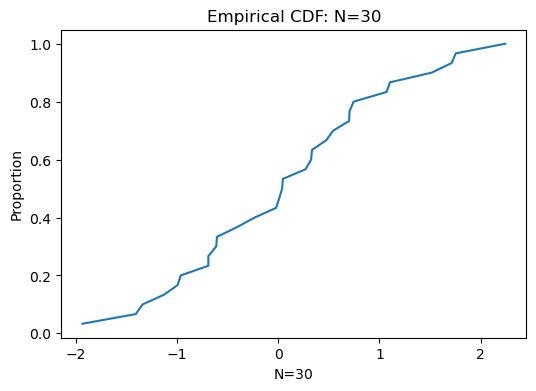

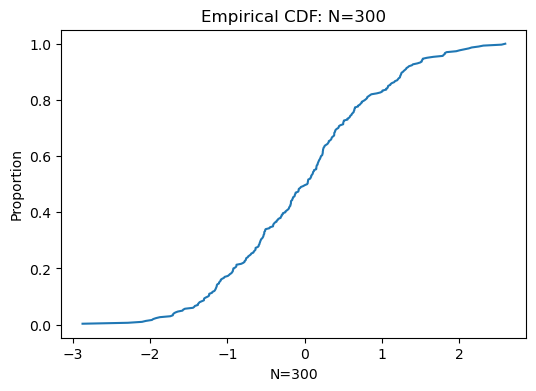

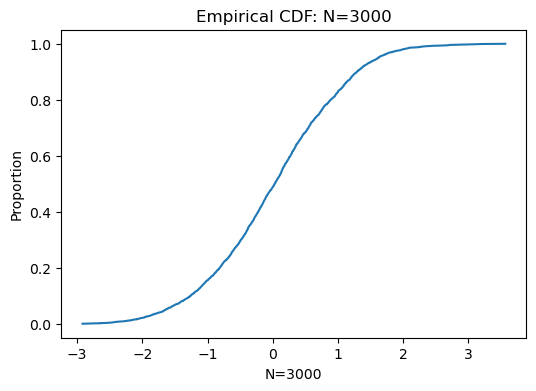

In [13]:
import numpy as np
import seaborn as sns

def ecdf(x, plot=True, label=None):
    # Compute ecdf function:
    Z = np.sort(np.unique(x)) # Extract and sort unique values for x
    compare = x.reshape(-1,1) <= Z.reshape(1,-1) # Compare x and Z values
    ecdf_vals = np.mean(compare,axis=0) # Average over x indices for each z

    if plot:
        title_str = label
        plt.plot(Z,ecdf_vals)
        plt.title(f'Empirical CDF: {title_str}')
        plt.ylabel('Proportion')
        plt.xlabel(title_str)

    return ecdf_vals, Z

rng = np.random.default_rng(100)

for N in (3,30,300,3000):
    X = rng.normal(0,1,N)
    plt.figure(figsize=(6,4))   # <-- New figure for each N
    ecdf(X, plot=True, label=f"N={N}")
    plt.show()


4. A **quantile** generalizes the concept of the median so that instead of 50% of the mass below and 50% above, the $q$-quantile is the value for which $q$ proportion of the data are below that value and $(1-q)$ proportion of the data are above that value. This is a concept of **order**.

- Write a function that computes any quantile without using Numpy's `np.quantile`
  - see code below.
- Write a function that computes the **Interquartile Range (IQR)** -- the .25 quantile and the .75 quantile, which brackets 50% of the data -- and the **whiskers**: $\pm 1.5 \times \text{IQR}$ from the edges of the IQR
  - see code below.
- Write a function that computes a five-number summary and values for a boxplot: the minimum, the .25 quantile, the median, the .75 quantile, and the maximum, and the whiskers
  - see code below.
- Anything outside the whiskers is an **outlier**; write a function that returns a Boolean vector indicating if the observations are outliers.
  - see code below.
- For a numeric variable of your choice from one of the datasets, apply your functions from above, and compare your answers with `sns.boxplot` and `df.describe`. 
  - see code and boxplot below. Overall, when applied to the `Age at Diagnosis` variable from the metabric dataset, my functions performed quite well when compared with `sns.boxplot` and `df.describe`.

In [8]:
#4.1 Function that computes any quantile without using Numpy's np.quantile
def compute_quantile(F_hat, grid, q):
  # Find median index closest to q
  idx = np.searchsorted(F_hat, q)
  if idx == 0:
    return grid[0]
  elif idx == len(F_hat):
    return grid[-1]
  
  # Points just below and above the q threshold:
  x0, x1 = grid[idx - 1], grid[idx]
  y0, y1 = F_hat[idx - 1], F_hat[idx]
  # Linear interpolation for median:
  t = (q - y0) / (y1 - y0)
  return x0 + t * (x1 - x0)

In [25]:
#4.2 Function that computes IQR and the whiskers: +- 1.5 * IQR
def compute_iqr_and_whiskers(F_hat, grid):
  q_25 = compute_quantile(F_hat, grid, q=0.25)
  q_75 = compute_quantile(F_hat, grid, q=0.75)
  iqr = q_75 - q_25

  lower_whisker = q_25 - 1.5 * iqr
  upper_whisker = q_75 + 1.5 * iqr

  return iqr, lower_whisker, upper_whisker

In [27]:
#4.3 Function that computes five-number summary
def compute_five_number_summary(F_hat, grid):
  data_min = grid[0]
  q_25 = compute_quantile(F_hat, grid, q=0.25)
  median = compute_quantile(F_hat, grid, q=0.5)
  q_75 = compute_quantile(F_hat, grid, q=0.75)
  data_max = grid[-1]

  _, lower_whisker, upper_whisker = compute_iqr_and_whiskers(F_hat, grid)

  return {
        "min": data_min,
        "q25": q_25,
        "median": median,
        "q75": q_75,
        "max": data_max,
        "lower_whisker": lower_whisker,
        "upper_whisker": upper_whisker
    }

In [33]:
#4.4 Function that detects outliers returning boolean array
def detect_outliers(x, F_hat, grid):
  _, lower_whisker, upper_whisker = compute_iqr_and_whiskers(F_hat, grid)

  x = np.asarray(x)
  mask = (x < lower_whisker) | (x > upper_whisker)

  return mask

25% quantile: 51.006249999999994
Median: 61.129999999999995
75% quantile: 69.80749999999999
IQR: 18.801249999999996
Lower Whisker: 22.804375
Upper Whisker: 98.00937499999998
Five Number Summary: {'min': np.float64(21.93), 'q25': np.float64(51.006249999999994), 'median': np.float64(61.129999999999995), 'q75': np.float64(69.80749999999999), 'max': np.float64(96.29), 'lower_whisker': np.float64(22.804375), 'upper_whisker': np.float64(98.00937499999998)}
Number of Outliers: 1

Output from df.describe:
count    1343.000000
mean       60.598079
std        12.966330
min        21.930000
25%        51.045000
50%        61.140000
75%        69.815000
max        96.290000
Name: Age at Diagnosis, dtype: float64


<Axes: ylabel='Age at Diagnosis'>

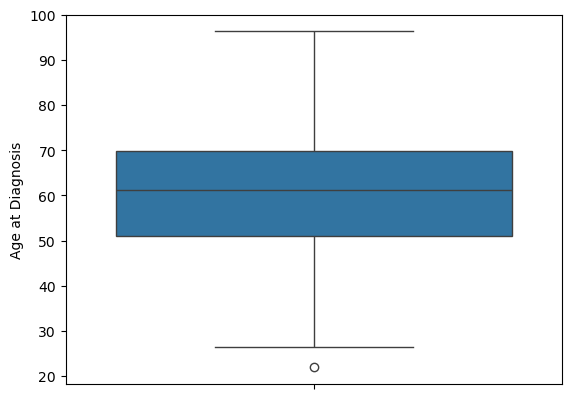

In [35]:
#4.5 Applying functions to Age at Diagnosis and comparing to sns.boxplot and df.describe

mdf = pd.read_csv("../data/metabric.csv")

F_hat, grid = ecdf(mdf['Age at Diagnosis'].to_numpy(), plot=False)

print(f"25% quantile: {compute_quantile(F_hat, grid, 0.25)}")
print(f"Median: {compute_quantile(F_hat, grid, q=0.5)}")
print(f"75% quantile: {compute_quantile(F_hat, grid, 0.75)}")
iqr, lower_whisker, upper_whisker = compute_iqr_and_whiskers(F_hat, grid)
print(f"IQR: {iqr}")
print(f"Lower Whisker: {lower_whisker}")
print(f"Upper Whisker: {upper_whisker}")
print(f"Five Number Summary: {compute_five_number_summary(F_hat, grid)}")
outlier_array = detect_outliers(mdf['Age at Diagnosis'], F_hat, grid)
num_outliers = sum(outlier_array)
print(f"Number of Outliers: {num_outliers}\n")

print(f"Output from df.describe:\n{mdf['Age at Diagnosis'].describe()}")
sns.boxplot(mdf['Age at Diagnosis'])

### From Annoucement on Canvas, no longer need to complete question 5

5. The kernel density estimator captures the concentration of the data around various points, and is defined as
$$
\hat{f}_{N,h}(z) = \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k \left( \frac{x_i - z}{h}\right)
$$
where $h$ is the bandwidth and $k()$ is one of the kernel functions from the class materials (Gaussian, Epanechnikov, uniform, triangular).

- Write a function that takes the bandwidth $h$ as given, and computes and plots $\hat{f}_{N,h}(z)$, for the kernels listed in the slides
- Write a function that computes the plug-in bandwidth
- Use your functions to analyze some numeric variables from a dataset of your choice, using a variety of bandwidths
- Compare bandwidths that are greater or less than the plug-in value with the results for the plug-in value. When does the KDE appear to be overfitting? Underfitting?